## Data Exploratory Analysis of Boston House Prices Dataset
***

In [494]:
import pandas as pd

In [495]:
#read the csv file
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('housing.csv', names=columns, sep='\s+')

In [496]:
print(dataset.shape)

(506, 14)


In [497]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [498]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [499]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Histograms for the distribution of the features
***

Text(0.5,0.98,'Feature distribution')

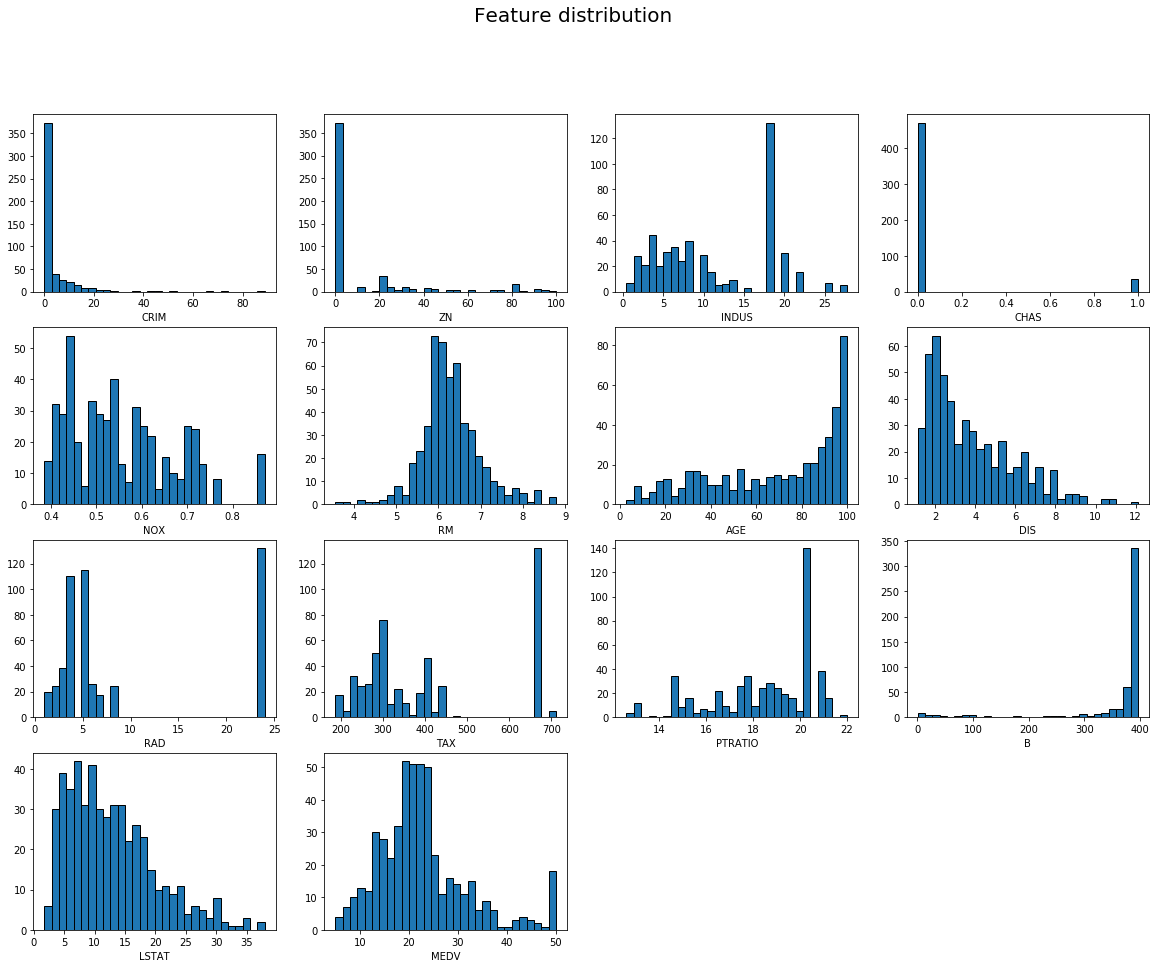

In [500]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
for i in range(dataset.shape[1]):
    plt.subplot(4,4,i+1)
    plt.hist(dataset.iloc[:,i],edgecolor='k', bins=30)
    plt.xlabel(columns[i])
plt.suptitle('Feature distribution', fontsize=20)

## Box plots for the features
***

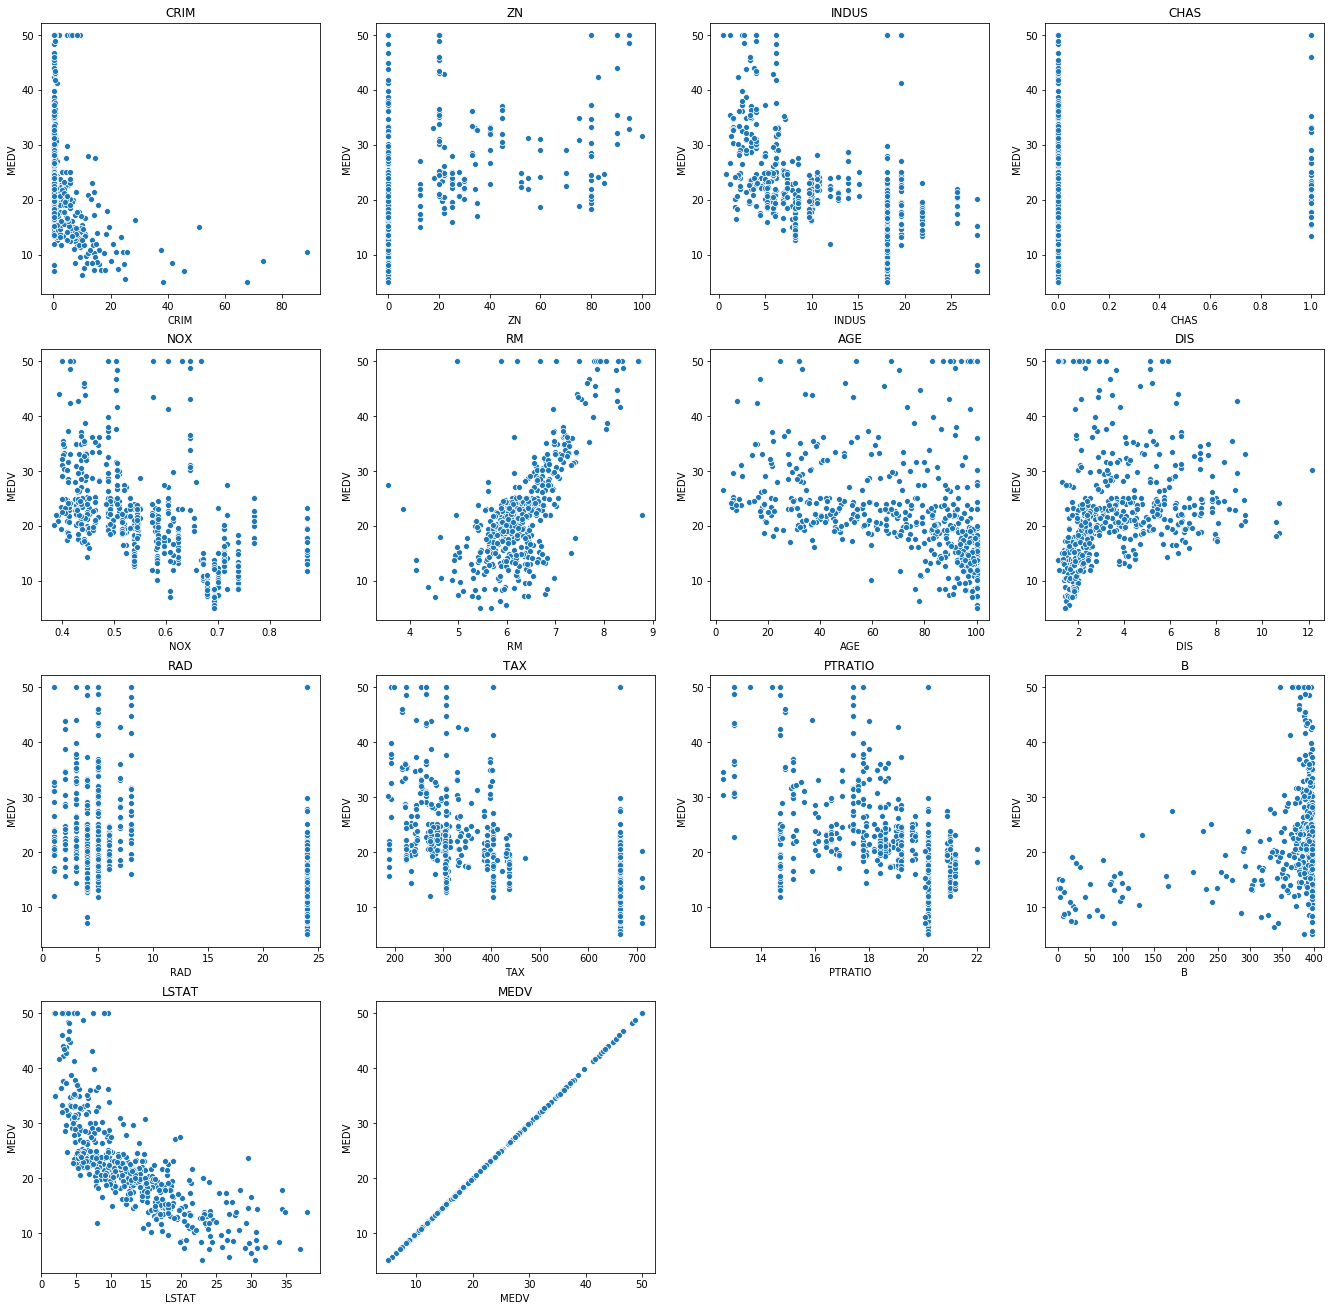

In [501]:
import seaborn as sns

plt.figure(figsize=(23, 23))

for i, column in enumerate(dataset.columns):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(x=dataset[column], y=dataset['MEDV'])
    plt.title(column)

# plt.tight_layout()
# plt.show()

## Correlation Matrix heatmap
***

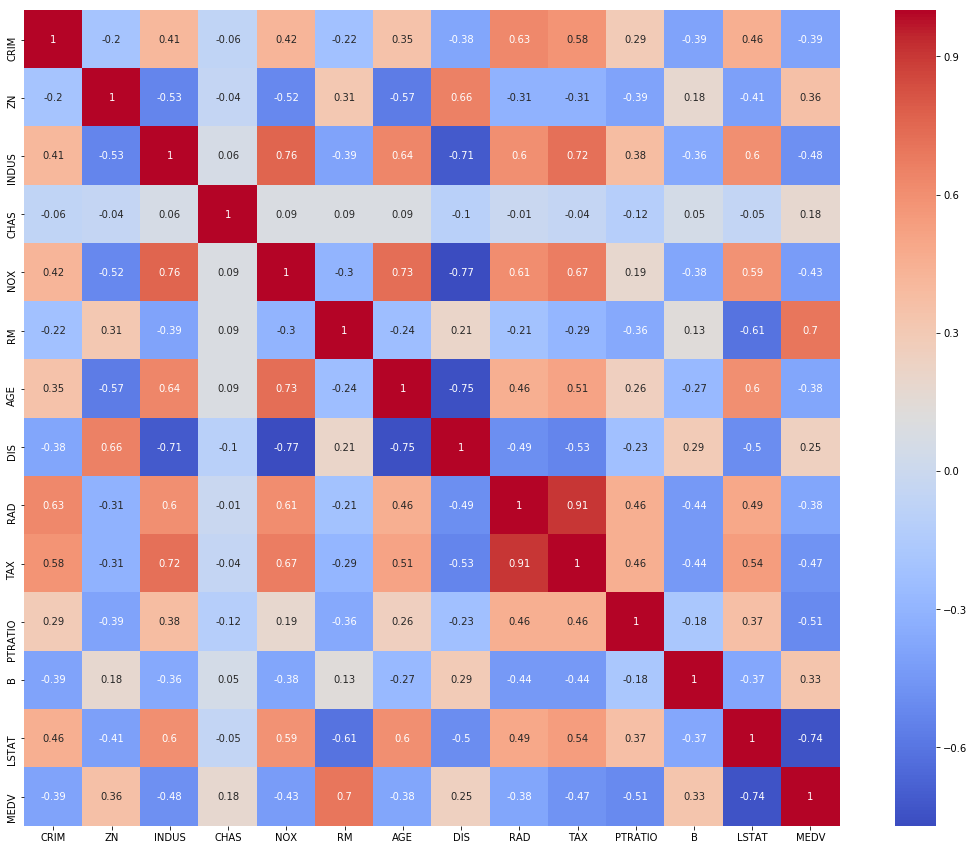

In [502]:
plt.figure(figsize=(20,15))
corr_matrix = dataset.corr().round(2)
# print(corr_matrix)
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',square=True)

## Model training with the original data
***

In [503]:
#data split
from sklearn.model_selection import train_test_split

X_ori = dataset.iloc[:,:13]
Y_ori = dataset.iloc[:,13]

Xori_train, Xori_test, Yori_train, Yori_test = train_test_split(X_ori, Y_ori, test_size=0.2, random_state=5)
print(Xori_train.shape)
print(Xori_test.shape)
print(Yori_train.shape)
print(Yori_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


Linear Regression MSE for train data: 22.477090408387625
Linear Regression MSE for test data: 20.869292183770494


/Users/qiaoshuangshuang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


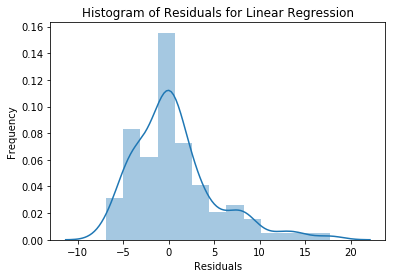

In [504]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def create_linear_regression_model(X_train, Y_train, X_test, Y_test):
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    
    lr_mse_train = mean_squared_error(Y_train, y_train_pred)
    lr_mse_test = mean_squared_error(Y_test, y_test_pred)
    
    print('Linear Regression MSE for train data:', lr_mse_train)
    print('Linear Regression MSE for test data:', lr_mse_test)
    # Checking residuals
    sns.distplot(Y_test-y_test_pred)
    plt.title("Histogram of Residuals for Linear Regression")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()


create_linear_regression_model(Xori_train, Yori_train, Xori_test, Yori_test)

Polynomial Regression MSE for train data with degree of 2: 5.8793784367472215
Polynomial Regression MSE for test data with degree of 2: 10.21778902936157


/Users/qiaoshuangshuang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


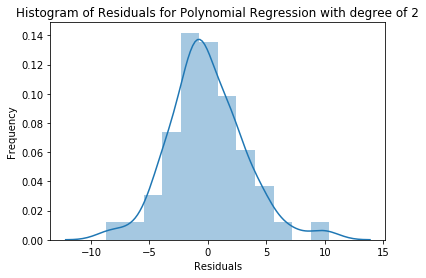

Polynomial Regression MSE for train data with degree of 3: 2.4131428035877794e-14
Polynomial Regression MSE for test data with degree of 3: 165099.14601297057


/Users/qiaoshuangshuang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


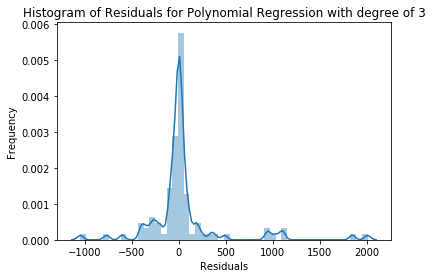

In [505]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree, X_train, Y_train, X_test, Y_test):
    "Creates a polynomial regression model for the given degree"
    poly_features = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly_features.fit_transform(X_train)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
    
    y_train_predict = poly_model.predict(X_train_poly)
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
    
    poly_mse_train = mean_squared_error(Y_train, y_train_predict)
    poly_mse_test = mean_squared_error(Y_test, y_test_predict)
    print(f'Polynomial Regression MSE for train data with degree of {degree}:', poly_mse_train)
    print(f'Polynomial Regression MSE for test data with degree of {degree}:', poly_mse_test)
    
    sns.distplot(Y_test-y_test_predict)
    plt.title(f"Histogram of Residuals for Polynomial Regression with degree of {degree}")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()
create_polynomial_regression_model(2, Xori_train, Yori_train, Xori_test, Yori_test)
create_polynomial_regression_model(3, Xori_train, Yori_train, Xori_test, Yori_test)

Decision Tree MSE for train data: 0.0
Decision Tree MSE for test data: 33.02431372549019


/Users/qiaoshuangshuang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


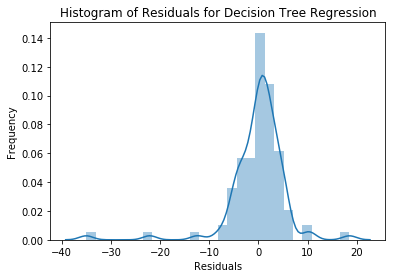

In [506]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor

def create_dt_regression_model(X_train, Y_train, X_test, Y_test):
    "Creates a polynomial regression model for the given degree"
    dt = DecisionTreeRegressor()
    dt.fit(X_train, Y_train)
    
    y_train_predict = dt.predict(X_train)
    y_test_predict = dt.predict(X_test)
    
    poly_mse_train = mean_squared_error(Y_train, y_train_predict)
    poly_mse_test = mean_squared_error(Y_test, y_test_predict)
    print(f'Decision Tree MSE for train data:', poly_mse_train)
    print(f'Decision Tree MSE for test data:', poly_mse_test)
    
    sns.distplot(Y_test-y_test_predict)
    plt.title("Histogram of Residuals for Decision Tree Regression")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()
create_dt_regression_model(Xori_train, Yori_train, Xori_test, Yori_test)
# create_dt_regression_model(Xori_train, Yori_train, Xori_test, Yori_test)

/Users/qiaoshuangshuang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/qiaoshuangshuang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Random Forest MSE for train data: 2.598988613861386
Random Forest MSE for test data: 13.91168529411765


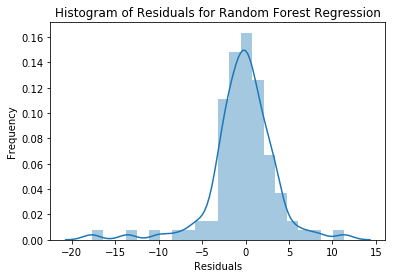

In [507]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

def create_rf_regression_model(X_train, Y_train, X_test, Y_test):
    "Creates a polynomial regression model for the given degree"
    rf = RandomForestRegressor()
    rf.fit(X_train, Y_train)
    
    y_train_predict = rf.predict(X_train)
    y_test_predict = rf.predict(X_test)
    
    poly_mse_train = mean_squared_error(Y_train, y_train_predict)
    poly_mse_test = mean_squared_error(Y_test, y_test_predict)
    print(f'Random Forest MSE for train data:', poly_mse_train)
    print(f'Random Forest MSE for test data:', poly_mse_test)
    
    sns.distplot(Y_test-y_test_predict)
    plt.title("Histogram of Residuals for Random Forest Regression")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()
create_rf_regression_model(Xori_train, Yori_train, Xori_test, Yori_test)

## Data preprocessing
***

In [508]:
# dataset.drop(['CHAS'],axis=1,inplace=True)
# dataset.drop(['TAX'],axis=1, inplace=True)

dataset.drop(['CHAS'],axis=1,inplace=True)
# dataset.drop(['RAD'],axis=1,inplace=True)
dataset.drop(['CRIM'],axis=1,inplace=True)
# dataset.drop(['ZN'],axis=1,inplace=True)
# dataset.drop(['B'],axis=1,inplace=True)

X_process = dataset.iloc[:,:8]
Y_process = dataset.iloc[:,8]


X_train, X_test, Y_train, Y_test = train_test_split(X_process, Y_process, test_size=0.2, random_state=5)
    
#train_test_split(X_process, Y_process, test_size=0.2, random_state=5))
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 8)
(102, 8)
(404,)
(102,)


## Linear Regression
***

Linear Regression MSE for train data: 2.6380673956180316
Linear Regression MSE for test data: 2.6424094168264016


/Users/qiaoshuangshuang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


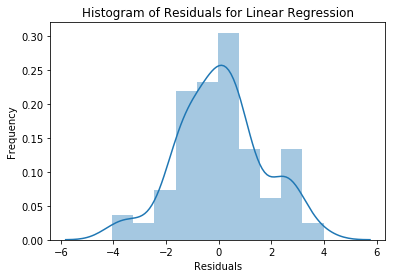

In [509]:
create_linear_regression_model(X_train, Y_train, X_test, Y_test)

Polynomial Regression MSE for train data with degree of 2: 1.3145827161003854
Polynomial Regression MSE for test data with degree of 2: 1.6555519754212171


/Users/qiaoshuangshuang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


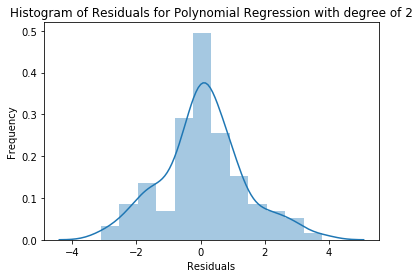

Polynomial Regression MSE for train data with degree of 3: 0.08792513251978823
Polynomial Regression MSE for test data with degree of 3: 1.527832624817342


/Users/qiaoshuangshuang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


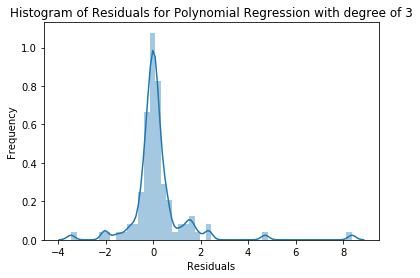

Polynomial Regression MSE for train data with degree of 4: 2.014086072825153e-08
Polynomial Regression MSE for test data with degree of 4: 169.78958845941287


/Users/qiaoshuangshuang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


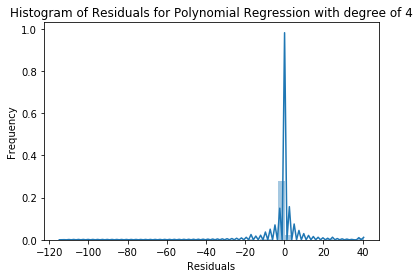

In [510]:
create_polynomial_regression_model(2, X_train, Y_train, X_test, Y_test)
create_polynomial_regression_model(3, X_train, Y_train, X_test, Y_test)
create_polynomial_regression_model(4, X_train, Y_train, X_test, Y_test)

Decision Tree MSE for train data: 2.1429679857969207e-28
Decision Tree MSE for test data: 0.6949019607843137


/Users/qiaoshuangshuang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


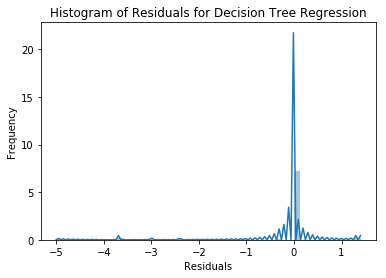

/Users/qiaoshuangshuang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/qiaoshuangshuang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Random Forest MSE for train data: 0.06513910891089111
Random Forest MSE for test data: 0.2757480392156863


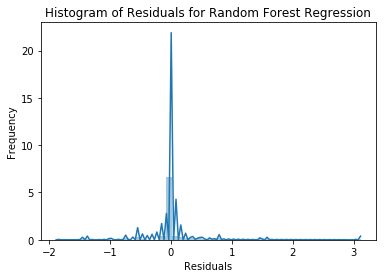

In [511]:
create_dt_regression_model(X_train, Y_train, X_test, Y_test)
create_rf_regression_model(X_train, Y_train, X_test, Y_test)
